# Análise de Séries Temporais no Mercado Financeiro

In [1]:
# Instalar e carregar os pacotes
install.packages("quantmod")
install.packages("xts")
install.packages("moments")
library(quantmod)
library(xts)
library(moments)

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\chnat\AppData\Local\Temp\Rtmpsrlfvh\downloaded_packages
package 'xts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\chnat\AppData\Local\Temp\Rtmpsrlfvh\downloaded_packages
package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\chnat\AppData\Local\Temp\Rtmpsrlfvh\downloaded_packages


Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


In [2]:
# Seleção do período de análise
startDate = as.Date("2020-01-01")
endDate = as.Date("2020-10-28")

In [3]:
# Download dos dados do período usando o Yahoo Finance 
getSymbols("PETR4.SA", src = "yahoo", from = startDate, to = endDate, auto.assign = T)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
"PETR4.SA contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."

[1] "PETR4.SA"

In [4]:
# Checando o tipo de dado retornado
class(PETR4.SA)
is.xts(PETR4.SA)

[1] "xts" "zoo"

[1] TRUE

In [5]:
# Mostra os primeiros registros para as ações da Petrobras
head(PETR4.SA)

           PETR4.SA.Open PETR4.SA.High PETR4.SA.Low PETR4.SA.Close
2020-01-02         30.51         30.70        30.31          30.70
2020-01-03         30.88         31.24        30.45          30.45
2020-01-06         30.43         30.94        29.95          30.81
2020-01-07         30.82         30.88        30.47          30.69
2020-01-08         30.69         30.77        30.24          30.50
2020-01-09         30.47         30.62        30.25          30.40
           PETR4.SA.Volume PETR4.SA.Adjusted
2020-01-02        37774500          30.69773
2020-01-03        71595600          30.44775
2020-01-06        81844000          30.80772
2020-01-07        32822000          30.68773
2020-01-08        48215600          30.49774
2020-01-09        36102700          30.39775

In [6]:
PETR4.SA.Close <- PETR4.SA[, "PETR4.SA.Close"]
is.xts(PETR4.SA.Close)
head(Cl(PETR4.SA),5)

[1] TRUE

           PETR4.SA.Close
2020-01-02          30.70
2020-01-03          30.45
2020-01-06          30.81
2020-01-07          30.69
2020-01-08          30.50

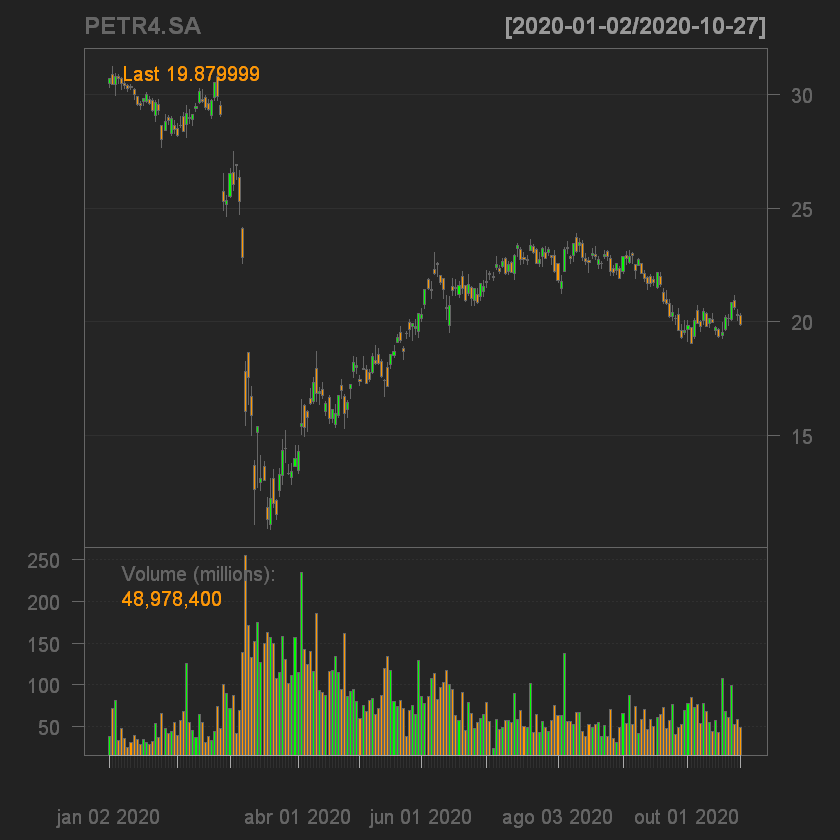

In [7]:
# Agora, vamos plotar o gráfico da Petrobras
# Gráfico de candlestick da Petrobras
candleChart(PETR4.SA)

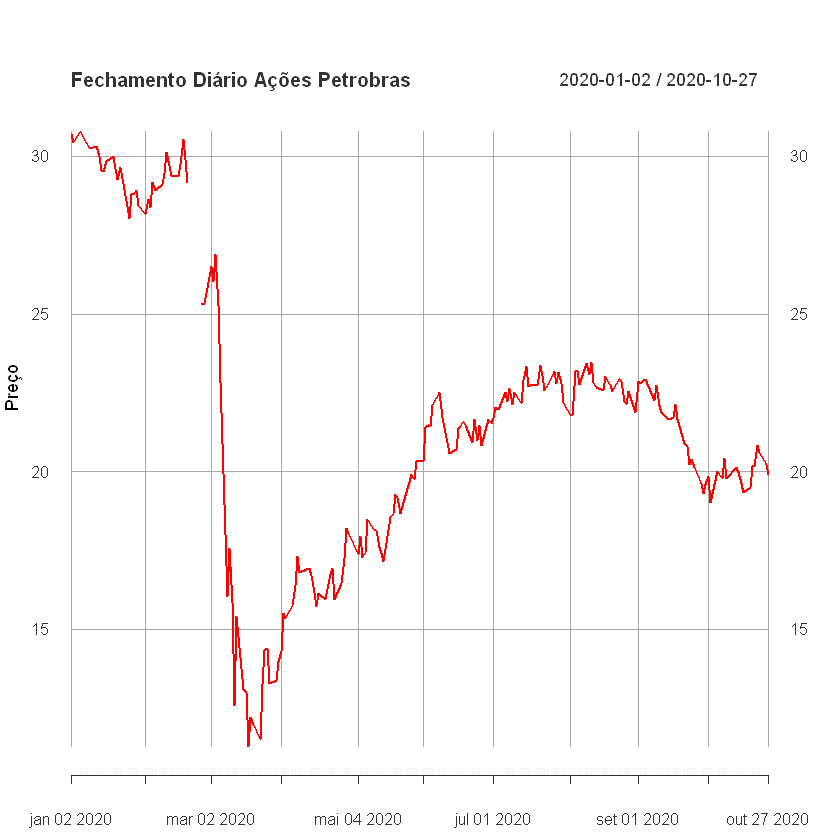

In [8]:
# Plot do fechamento
plot(PETR4.SA.Close, main = "Fechamento Diário Ações Petrobras",
     col = "red", xlab = "Data", ylab = "Preço", major.ticks = 'months',
     minor.ticks = FALSE)

# Adicionado as bandas de bollinger ao gráfico, com média de 20 períodos e 2 desvios

# Bollinger Band 
Como o desvio padrão é uma medida de volatilidade Bollinger Bands ajustam-se as condições de mercado. Mercados mais voláteis, possuem as bandas mais distantes da média, enquanto mercados menos voláteis possuem as bancas mais próximas da média.

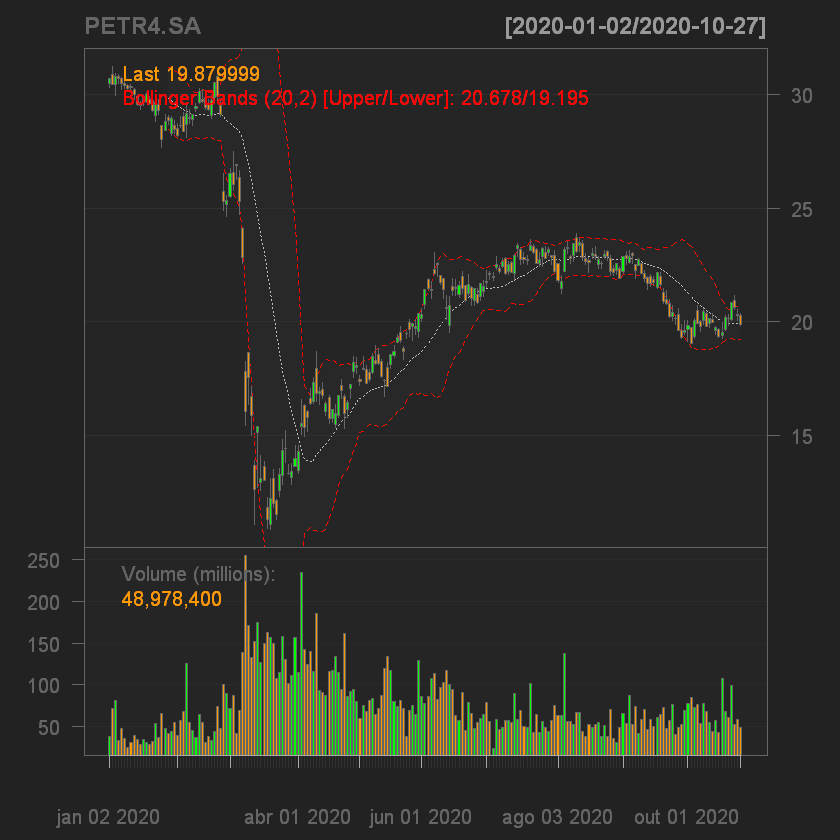

In [9]:
addBBands(n = 20, sd = 2)

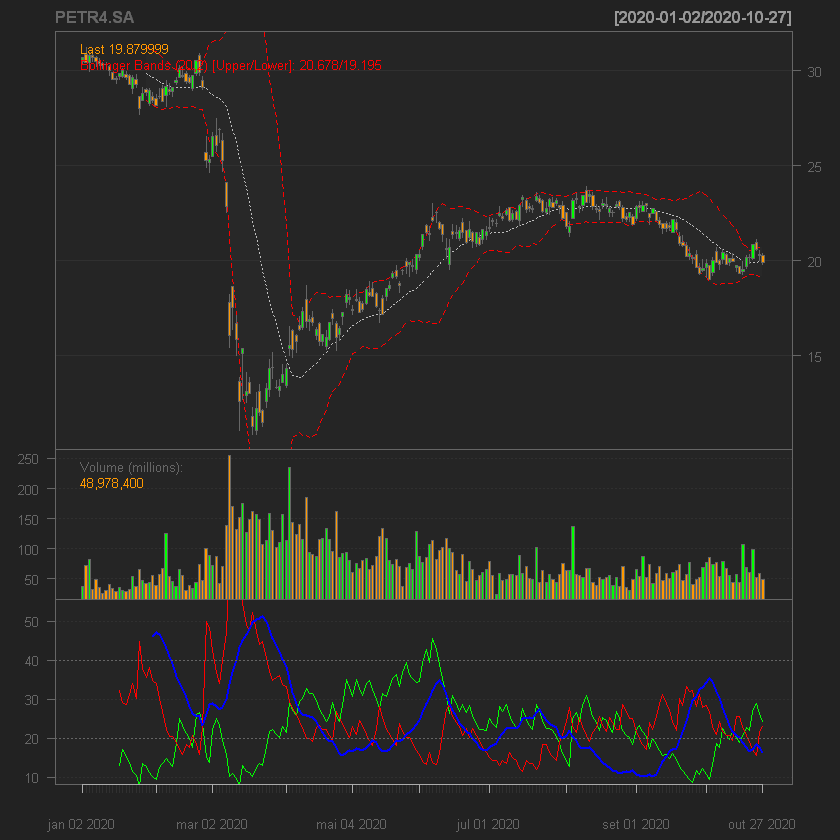

In [10]:
# Adicionando o indicador ADX, média 11 do tipo exponencial
addADX(n = 11, maType = "EMA")

In [11]:
# Calculando logs diários
PETR4.SA.ret <- diff(log(PETR4.SA.Close), lag = 1)

In [12]:
# Remove valores NA na prosição 1
PETR4.SA.ret <- PETR4.SA.ret[-1] 

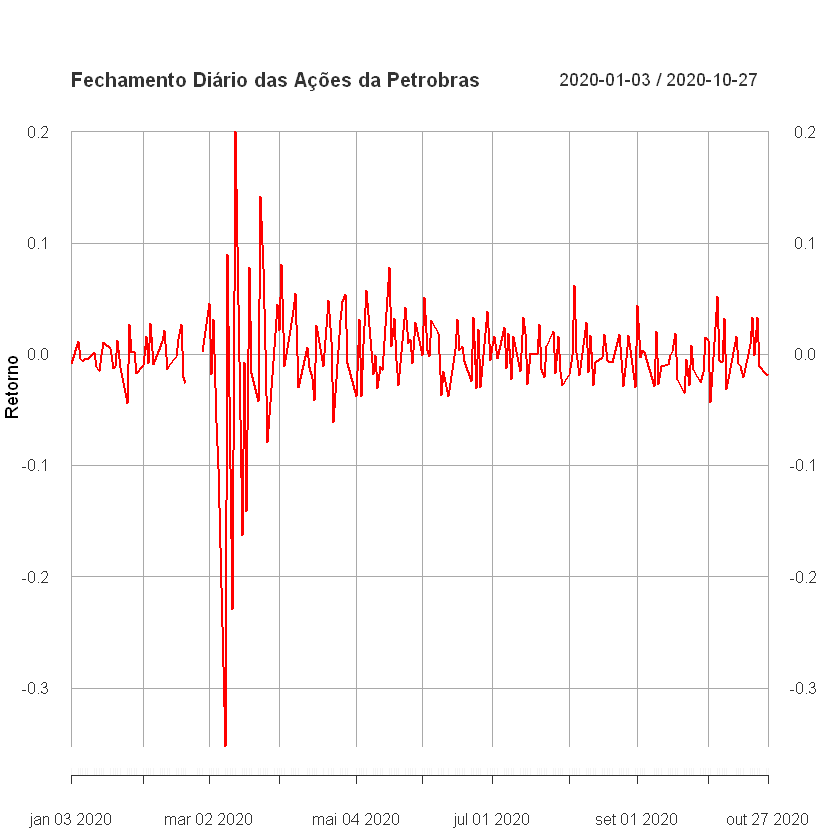

In [13]:
# Plotar a taxa de retorno
plot(PETR4.SA.ret, main = "Fechamento Diário das Ações da Petrobras",
     col = "red", xlab = "Data", ylab = "Retorno", major.ticks = 'months',
     minor.ticks = FALSE)